# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
    
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
286056               2020-07-30           2020-07-28            2020-07-15   
286057               2020-07-30           2020-07-30            2020-07-26   
286058               2020-07-30           2020-07-18            2020-07-18   
286059               2020-07-30           2020-07-26            2020-07-09   
286060               2020-07-30           2020-07-30            2020-07-30   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
286056             2020-07-06 00:00:00                   NaT   
286057             2020-07-25 00:00:00                   NaT   
286058             2020-07-03 00:00:00                   NaT   
286059             2020-07-09 00:00:00                   NaT   
286060             2020-07-30 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento Severidad  \
Id de caso                                                                      
1                         NaT          Bogotá d.c.      Bogotá D.C.      Leve   
2                         NaT  Guadalajara de buga  Valle del Cauca      Leve   
3                         NaT             Medellín        Antioquia      Leve   
4                         NaT             Medellín        Antioquia      Leve   
5                         NaT             Medellín        Antioquia      Leve   
...                       ...                  ...              ...       ...   
286056                    NaT               Soacha     Cundinamarca      Leve   
286057                    NaT               Soacha     Cundinamarca      Leve   
286058                    NaT               Caldas        Antioquia  Moderado   
286059                    NaT           Fusagasugá     Cundinamarca      Leve   
286060                    NaT             Sogamoso           Boyacá  Moderado   

                Estado  ... Clasificación de edad Sexo Pertenecia Étnica  \
Id de caso              ...                                                
1           Recuperado  ...               10 - 20    F              Otro   
2           Recuperado  ...               30 - 40    M              Otro   
3           Recuperado  ...               40 - 50    F              Otro   
4           Recuperado  ...               50 - 60    M              Otro   
5           Recuperado  ...               20 - 30    M              Otro   
...                ...  ...                   ...  ...               ...   
286056            Casa  ...               30 - 40    M               NaN   
286057            Casa  ...               30 - 40    F               NaN   
286058        Hospital  ...               40 - 50    M               NaN   
286059            Casa  ...               20 - 30    F               NaN   
286060        Hospital  ...               50 - 60    F               NaN   

           Nombre Grupo Étnico         Tipo Tipo de recuperación  \
Id de caso                                          

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1056   1454
Antioquia                                           13675  17010
Arauca                                                 49    153
Archipiélago de San Andrés Providencia y Santa ...     12     26
Atlántico                                           10511  11850
Barranquilla D.E.                                   13598  15824
Bogotá D.C.                                         48152  50057
Bolívar                                              1133   1351
Boyacá                                                488    494
Buenaventura D.E.                                     774   1321
Caldas                                                435    416
Caquetá                                               437    447
Cartagena D.T. y C.                                  6973   8449
Casanare                                              126    172
Cauca                                                 798   1021
Cesar                                                1293   1708
Chocó                                                1350   1617
Cundinamarca                                         4080   4173
Córdoba                                              2649   2764
Guainía                                                 6      8
Guaviare                                               11     75
Huila                                                 431    459
La Guajira                                            990   1063
Magdalena                                            1022   1109
Meta                                                  686   1946
Nariño                                               3575   4195
Norte de Santander                                    889   1252
Putumayo                                              386    465
Quindío                                               161    161
Risaralda                                             834    740
Santa Marta D.T. y C.                                1906   2022
Santander                                            1419   2063
Sucre                                                2676   3141
Tolima                                                820   1652
Valle del Cauca                                     10221  11677
Vaupés                                                 27     34
Vichada                                                 1      1

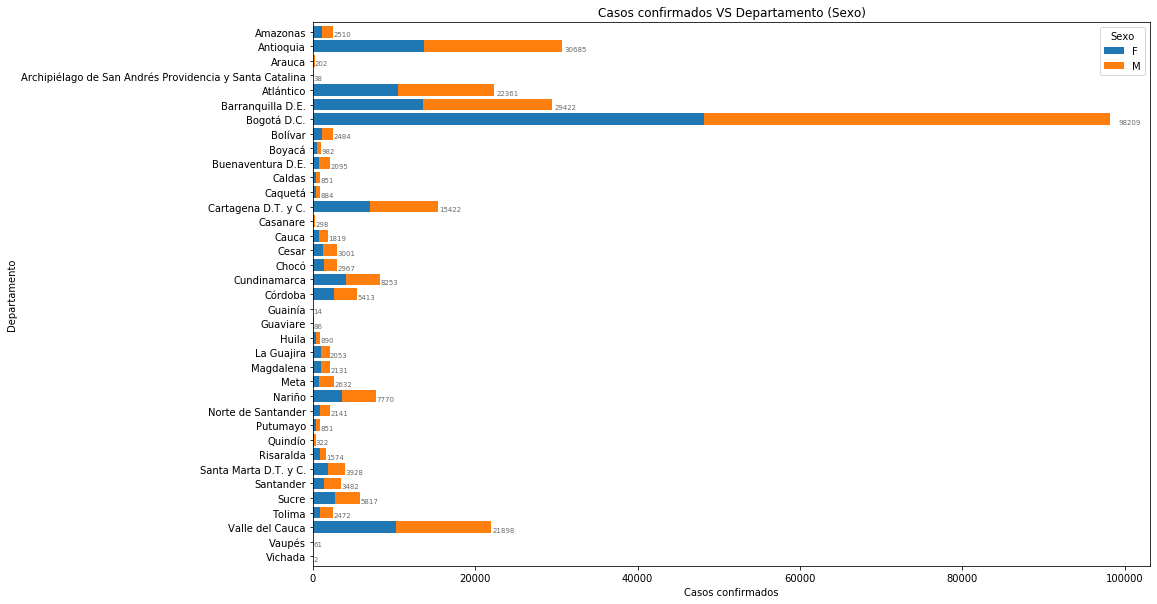

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               133      452      510   
Antioquia                                              988     2122     8151   
Arauca                                                   9       40       74   
Archipiélago de San Andrés Providencia y Santa ...       0        1       10   
Atlántico                                              984     1715     4828   
Barranquilla D.E.                                     1129     1911     6428   
Bogotá D.C.                                           4300     7496    22478   
Bolívar                                                123      231      547   
Boyacá                                                  56       83      211   
Buenaventura D.E.                                       45      280      479   
Caldas                                                  30       51      199   
Caquetá                                                 25       56      260   
Cartagena D.T. y C.                                    676     1139     3525   
Casanare                                                13       16       90   
Cauca                                                   90      160      435   
Cesar                                                  195      270      730   
Chocó                                                  124      258      701   
Cundinamarca                                           393      606     1906   
Córdoba                                                174      279     1114   
Guainía                                                  0        2        4   
Guaviare                                                 1       30       19   
Huila                                                   51       91      188   
La Guajira                                             109      205      444   
Magdalena                                              112      151      393   
Meta                                                    53      225      812   
Nariño                                                 361      663     1813   
Norte de Santander                                      69       87      493   
Putumayo                                                28       60      237   
Quindío                                                 12       19       63   
Risaralda                                               96      142      346   
Santa Marta D.T. y C.                                  152      264      868   
Santander                                              127      240      819   
Sucre                                                  231      462     1206   
Tolima                                                 105      138      729   
Valle del Cauca                                        734     1486     5010   
Vaupés                                                   4        5       19   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                481      342      274   
Antioquia                                              7692     4827     3605   
Arauca                                                   50       15        6   
Archipiélago de San Andrés Providencia y Santa ...       11        9        4   
Atlántico                                              5194     3557     2923   
Barranquilla D.E.                                      6981     4578     3956   
Bogotá D.C.                                           21645    15867    13290   
Bolívar                                                 569      365      231   
Boyacá                                                  193      152 

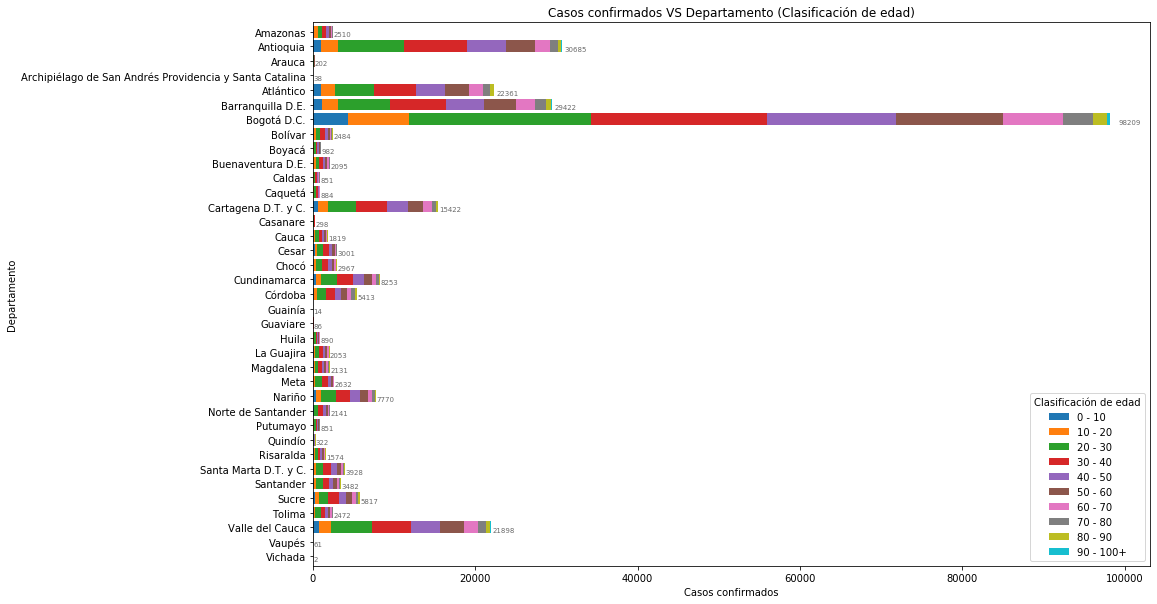

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               63.0      102.0   
Antioquia                                           19511.0      478.0   
Arauca                                                 51.0        3.0   
Archipiélago de San Andrés Providencia y Santa ...      6.0        0.0   
Atlántico                                            5116.0     1038.0   
Barranquilla D.E.                                    5555.0     1462.0   
Bogotá D.C.                                         45975.0     2658.0   
Bolívar                                               885.0      117.0   
Boyacá                                                409.0       27.0   
Buenaventura D.E.                                     263.0      140.0   
Caldas                                                508.0       10.0   
Caquetá                                               633.0       18.0   
Cartagena D.T. y C.                                  2922.0      471.0   
Casanare                                              149.0        4.0   
Cauca                                                 785.0       60.0   
Cesar                                                1191.0       61.0   
Chocó                                                 589.0      102.0   
Cundinamarca                                         3279.0      206.0   
Córdoba                                              2428.0      631.0   
Guainía                                                 0.0        1.0   
Guaviare                                               36.0        0.0   
Huila                                                 393.0       20.0   
La Guajira                                            728.0      115.0   
Magdalena                                             526.0      201.0   
Meta                                                  828.0       30.0   
Nariño                                               2733.0      246.0   
Norte de Santander                                   1318.0      101.0   
Putumayo                                              640.0       28.0   
Quindío                                                99.0        8.0   
Risaralda                                             765.0       27.0   
Santa Marta D.T. y C.                                1508.0      149.0   
Santander                                            1786.0       84.0   
Sucre                                                1986.0      363.0   
Tolima                                                888.0       47.0   
Valle del Cauca                                      7388.0      801.0   
Vaupés                                                  9.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                 6.0           4.0   
Antioquia                                             1256.0         169.0   
Arauca                                                   9.0           3.0   
Archipiélago de San Andrés Providencia y Santa ...       1.0           1.0   
Atlántico                                              645.0         103.0   
Barranquilla D.E.                                      742.0          87.0   
Bogotá D.C.                                           5085.0         324.0   
Bolívar                                                107.0          10.0   
Boyacá                                                  55.0           6.0   
Buenaventura D.E.                                      108.0          27.0   
Caldas                                                  26.0          11.0   
Caquetá                                                 73.0           4.0   
Cartagena D.T. y C.  

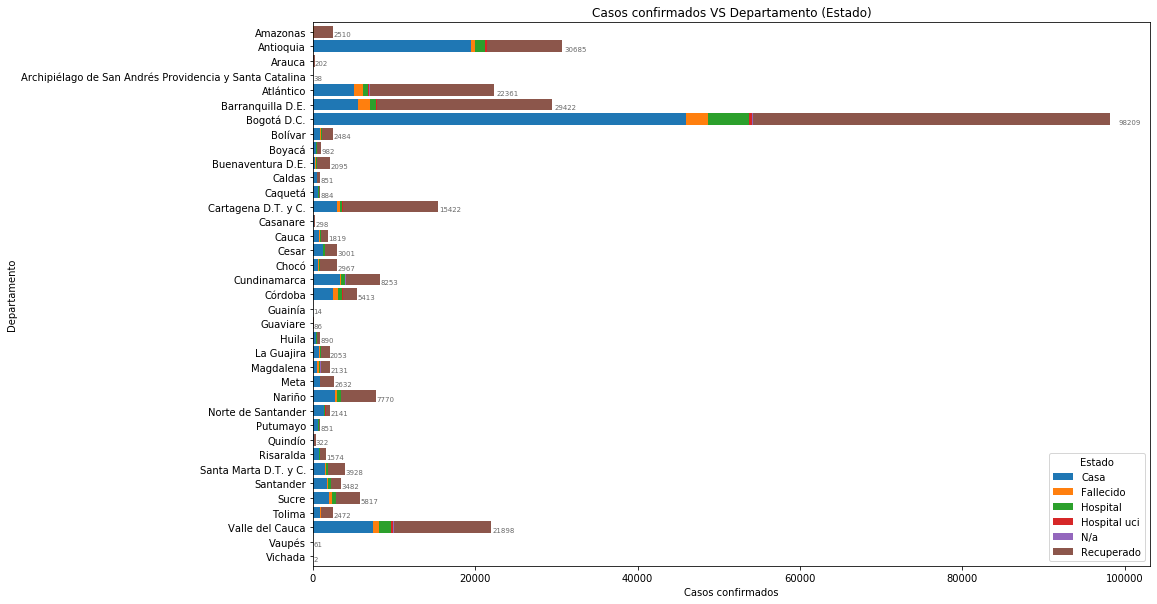

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          53715  58234
Fallecido      3555   6255
Hospital       5735   7650
Hospital uci    543   1040
N/a             256    342
Recuperado    69846  78849

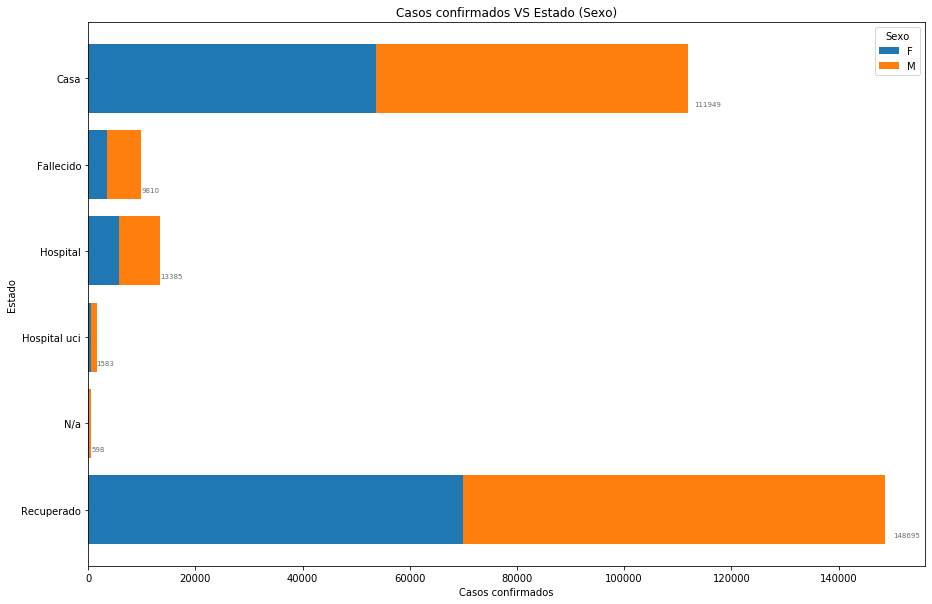

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     4318     8598    27935    27654    18370    13858   
Fallecido                  19       19      142      341      773     1492   
Hospital                  535      269      979     1535     1960     2732   
Hospital uci               68       26       56      168      231      376   
N/a                        18       13       28       26       48       73   
Recuperado               6774    12512    36999    36236    23638    18028   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      6766     2994     1243        213  
Fallecido                 2321     2448     1827        428  
Hospital                  2682     1748      837        108  
Hospital uci               362      226       64          6  
N/a                        115      129      115         33  
Recuperado                8888     3870     1502        248

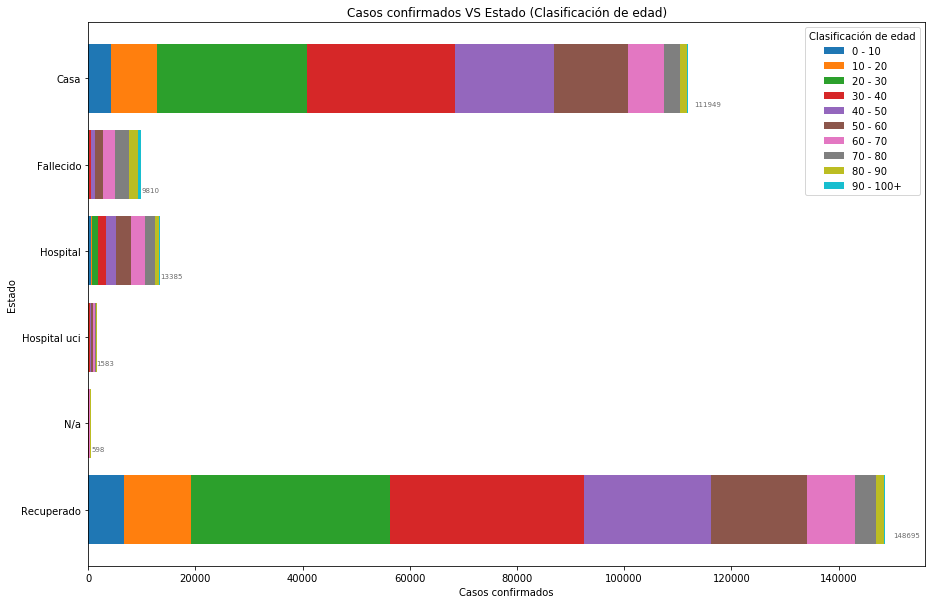

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Tipo                       
En estudio   127189  137810
Importado       455     520
Relacionado    6006   14040

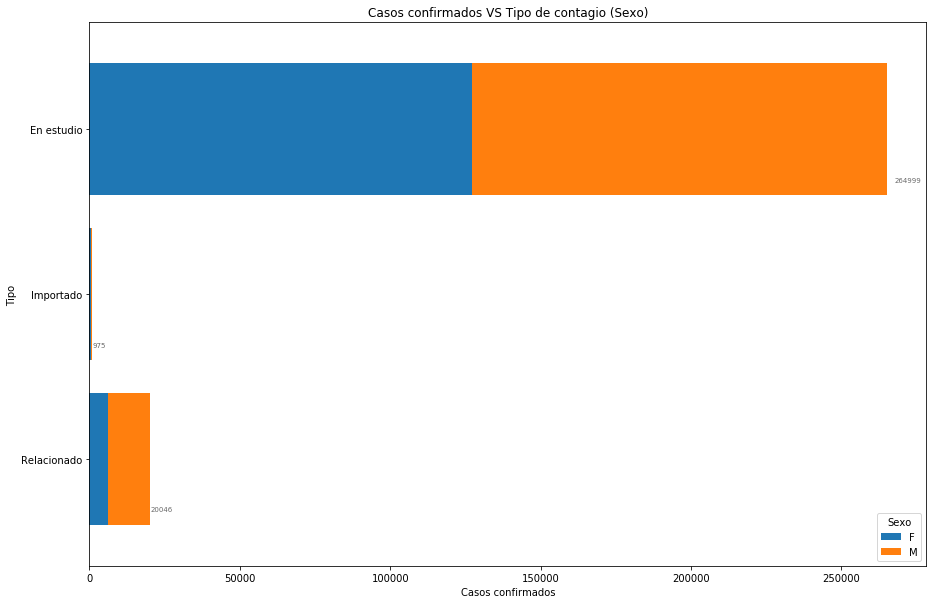

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio              10870    18998    60355    60878    42168    34495   
Importado                   6       37      240      230      173      150   
Relacionado               856     2402     5544     4852     2679     1914   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               20051    10906     5306        972  
Importado                   94       35        9          1  
Relacionado                989      474      273         63

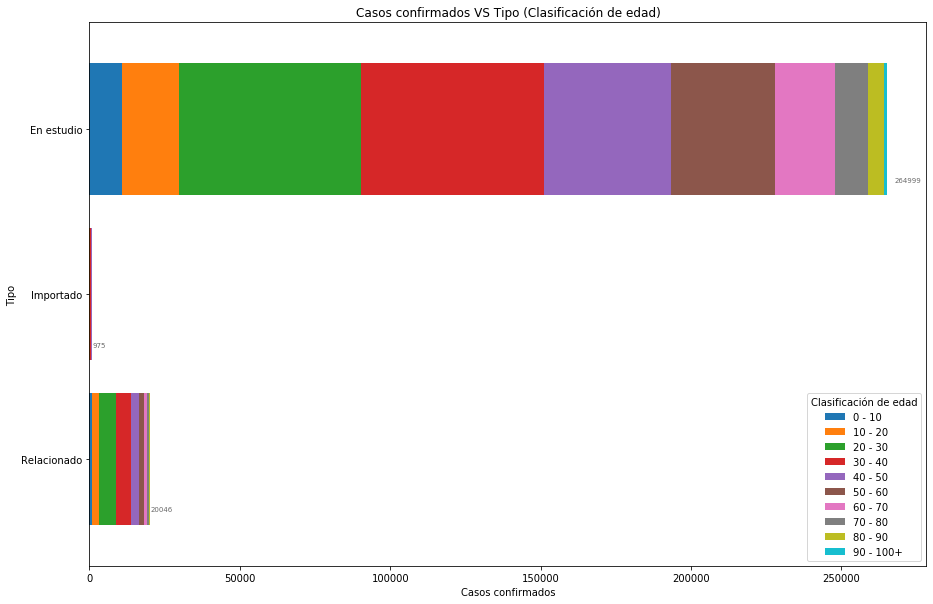

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  5786   5946
10 - 20                 9897  11540
20 - 30                31484  34655
30 - 40                30296  35664
40 - 50                21072  23948
50 - 60                16962  19597
60 - 70                 9677  11457
70 - 80                 5149   6266
80 - 90                 2737   2851
90 - 100+                590    446

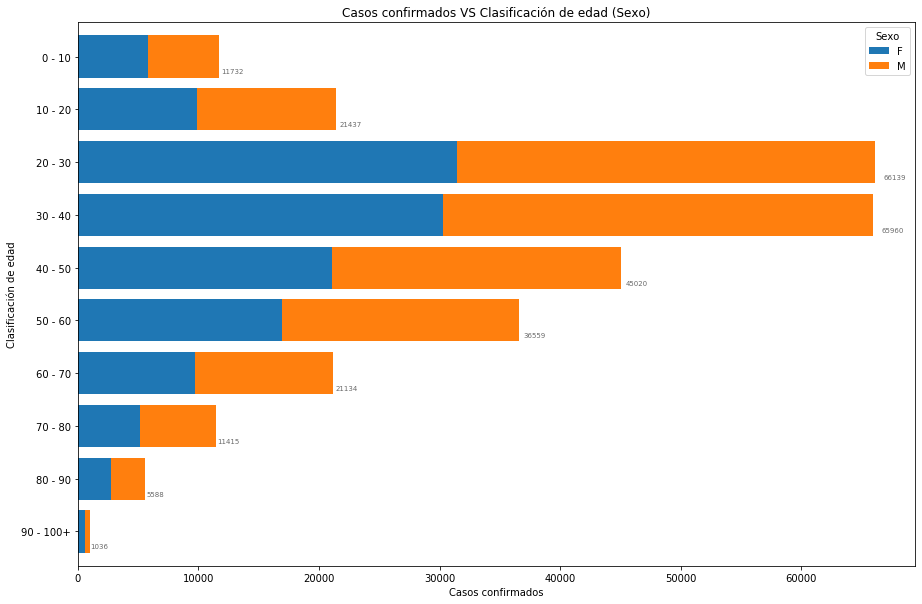

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  4318         19       535            68   18   
10 - 20                 8598         19       269            26   13   
20 - 30                27935        142       979            56   28   
30 - 40                27654        341      1535           168   26   
40 - 50                18370        773      1960           231   48   
50 - 60                13858       1492      2732           376   73   
60 - 70                 6766       2321      2682           362  115   
70 - 80                 2994       2448      1748           226  129   
80 - 90                 1243       1827       837            64  115   
90 - 100+                213        428       108             6   33   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       6774  
10 - 20                     12512  
20 - 30                     36999  
30 - 40                     36236  
40 - 50                     23638  
50 - 60                     18028  
60 - 70                      8888  
70 - 80                      3870  
80 - 90                      1502  
90 - 100+                     248

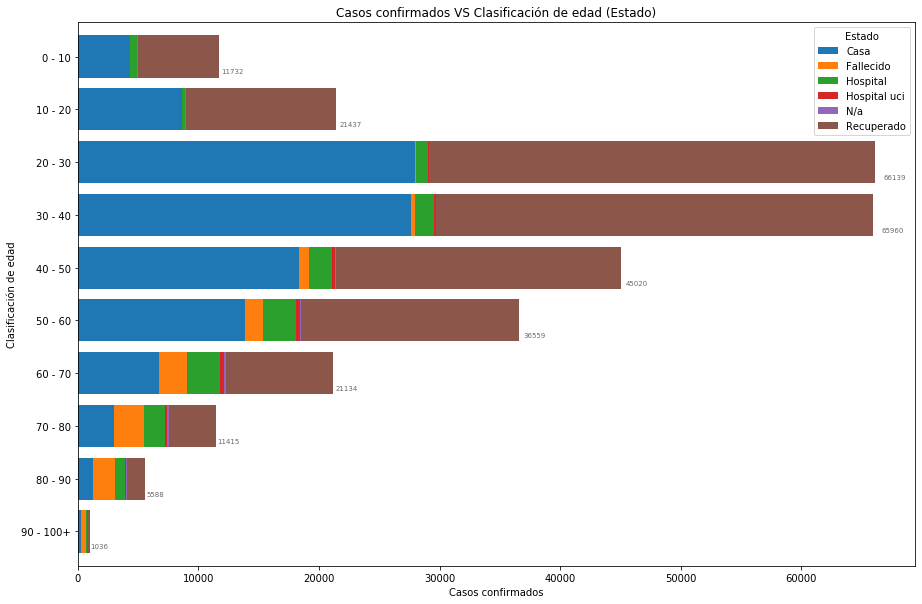

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-26            1942.0  2256.0
2020-07-27            3747.0  4121.0
2020-07-28            5995.0  6363.0
2020-07-29            3184.0  3158.0
2020-07-30              90.0   117.0

[144 rows x 2 columns]

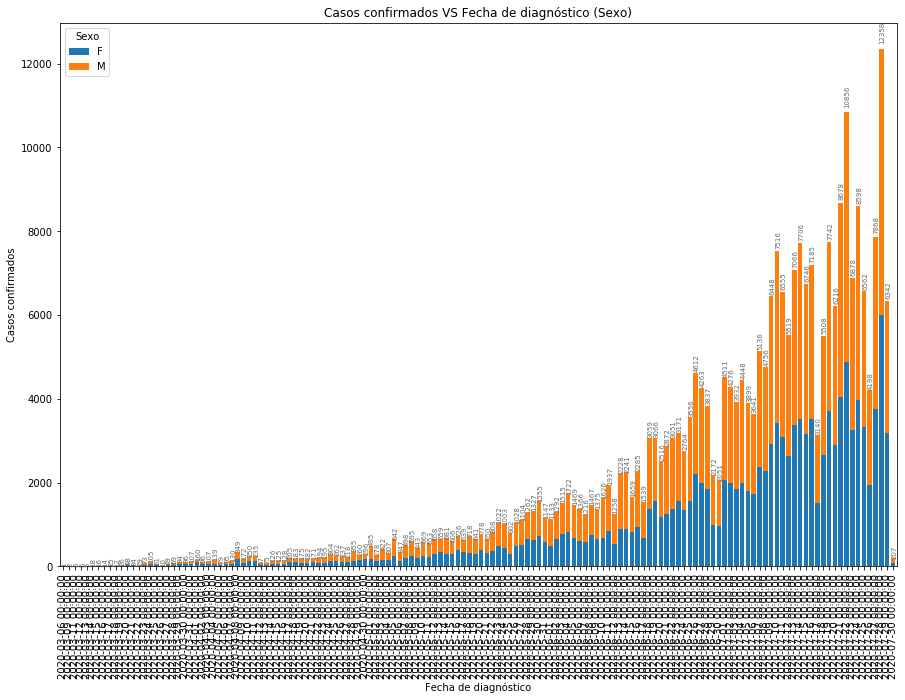

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-26                147      256      952      970      662      544   
2020-07-27                266      551     1850     1843     1295      946   
2020-07-28                506      925     2816     2780     1962     1675   
2020-07-29                228      421     1538     1499     1044      778   
2020-07-30                  7       22       34       46       20       35   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-26                 343      209      102         13  
2020-07-27                 601      305      173         38  
2020-07-28                 878      526      239         51  
2020-07-29                 468      220      124         22  
2020-07-30                  23       17        1          2  

[144 rows x 10 columns]

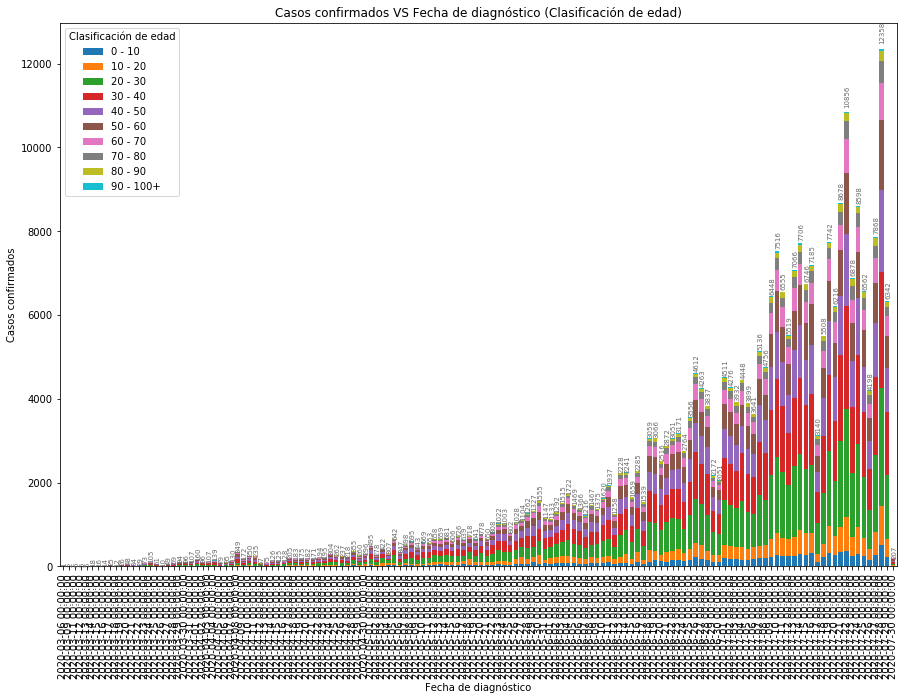

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                   Casa  Fallecido  Hospital  Hospital uci   N/a  \
Fecha de diagnóstico                                                     
2020-03-06                0.0        0.0       0.0           0.0   0.0   
2020-03-09                0.0        0.0       0.0           0.0   0.0   
2020-03-11                0.0        0.0       0.0           0.0   0.0   
2020-03-12                0.0        0.0       0.0           0.0   0.0   
2020-03-13                0.0        0.0       0.0           0.0   0.0   
...                       ...        ...       ...           ...   ...   
2020-07-26             3758.0      115.0     286.0          32.0   3.0   
2020-07-27             6984.0      132.0     420.0          35.0   6.0   
2020-07-28            10943.0      205.0     780.0          42.0  10.0   
2020-07-29             5886.0        0.0     416.0          40.0   0.0   
2020-07-30              192.0        0.0      10.0           5.0   0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-26                   4.0  
2020-07-27                 291.0  
2020-07-28                 378.0  
2020-07-29                   0.0  
2020-07-30                   0.0  

[144 rows x 6 columns]

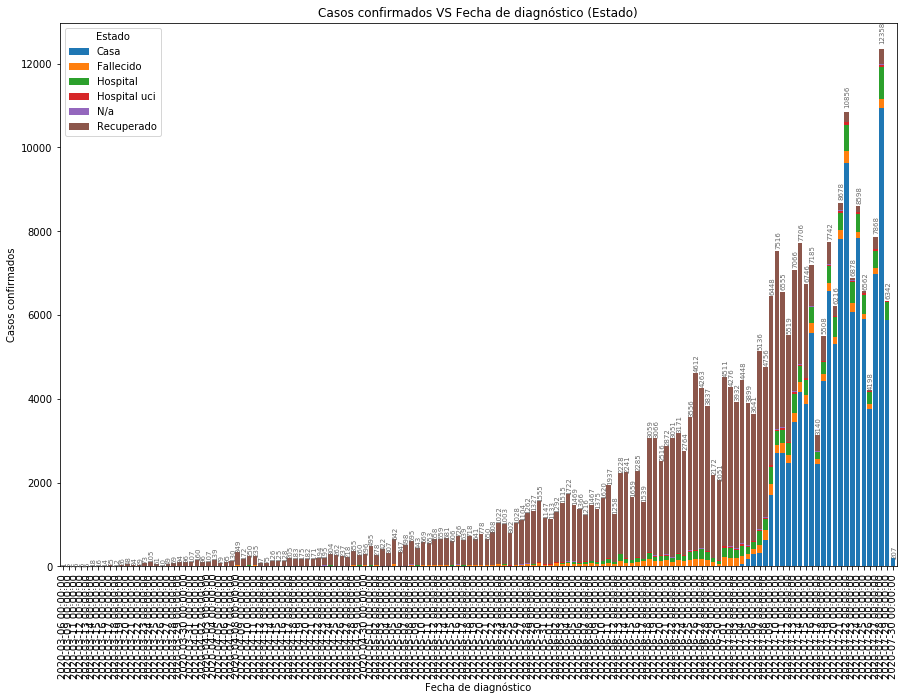

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                         F         M
Fecha de diagnóstico                    
2020-03-06                 1.0       0.0
2020-03-09                 2.0       1.0
2020-03-11                 6.0       3.0
2020-03-12                11.0       3.0
2020-03-13                13.0       6.0
...                        ...       ...
2020-07-26            118856.0  136610.0
2020-07-27            122603.0  140731.0
2020-07-28            128598.0  147094.0
2020-07-29            131782.0  150252.0
2020-07-30            131872.0  150369.0

[144 rows x 2 columns]

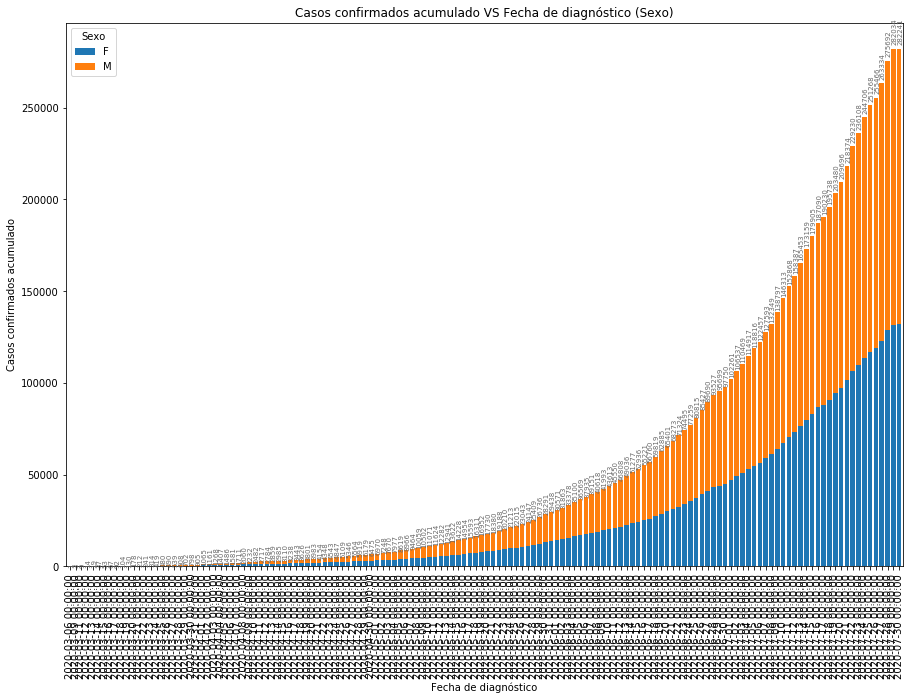

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-26              10592    19242    58998    58884    40144    32663   
2020-07-27              10858    19793    60848    60727    41439    33609   
2020-07-28              11364    20718    63664    63507    43401    35284   
2020-07-29              11592    21139    65202    65006    44445    36062   
2020-07-30              11599    21161    65236    65052    44465    36097   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-26               18873    10190     4967        913  
2020-07-27               19474    10495     5140        951  
2020-07-28               20352    11021     5379       1002  
2020-07-29               20820    11241     5503       1024  
2020-07-30               20843    11258     5504       1026  

[144 rows x 10 columns]

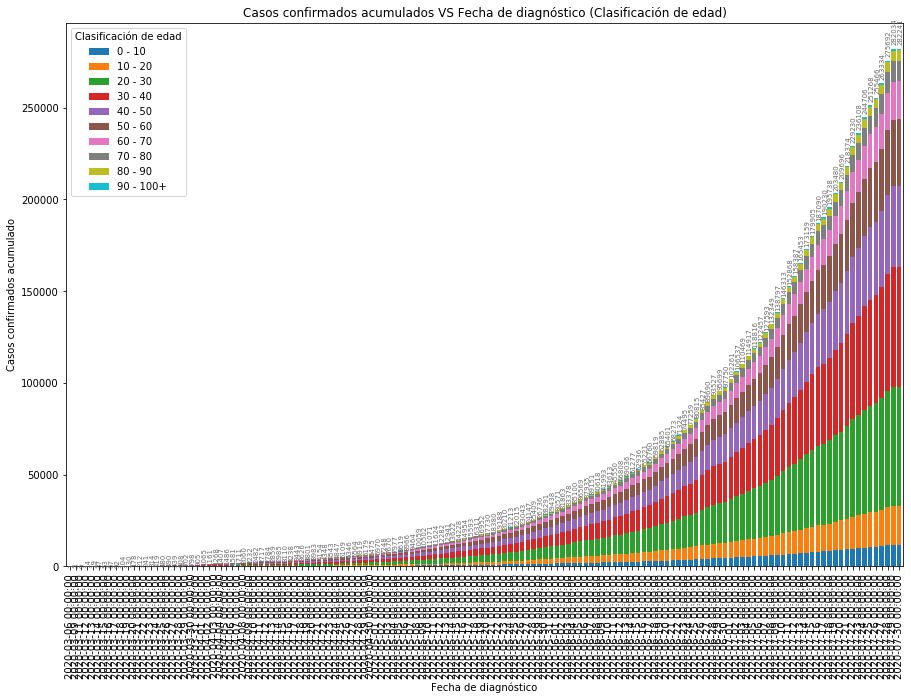

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                    Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                       
2020-03-06                 0.0        0.0       0.0           0.0    0.0   
2020-03-09                 0.0        0.0       0.0           0.0    0.0   
2020-03-11                 0.0        0.0       0.0           0.0    0.0   
2020-03-12                 0.0        0.0       0.0           0.0    0.0   
2020-03-13                 0.0        0.0       0.0           0.0    0.0   
...                        ...        ...       ...           ...    ...   
2020-07-26             87909.0     9285.0   11619.0        1432.0  562.0   
2020-07-27             94893.0     9417.0   12039.0        1467.0  568.0   
2020-07-28            105836.0     9622.0   12819.0        1509.0  578.0   
2020-07-29            111722.0     9622.0   13235.0        1549.0  578.0   
2020-07-30            111914.0     9622.0   13245.0        1554.0  578.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-26              144659.0  
2020-07-27              144950.0  
2020-07-28              145328.0  
2020-07-29              145328.0  
2020-07-30              145328.0  

[144 rows x 6 columns]

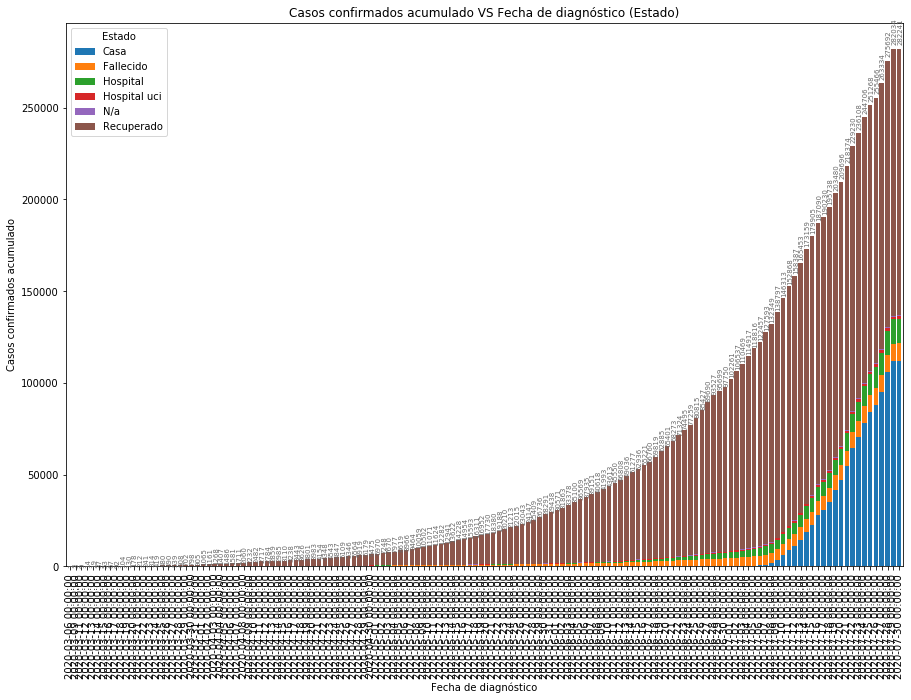

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>